## Classification

### Import Modules

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Fetch the MNIST data set

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### Look at these arrays

In [3]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### These have 70000 images and each image has 784 features as there are 28x28 pixels
#### Lets look at one digit from the data set

In [5]:
somedigit = X[0]
somedigitimage = somedigit.reshape(28,28) # turn the single dimesional array into a 28x28 like a picture
somedigit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### Each value of the some digit array is a value for the intensity oif the pixel, you can show this as a image using plt.imshow

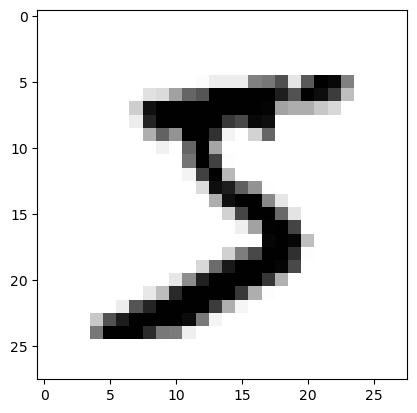

In [6]:
plt.imshow(somedigitimage,cmap='binary')

#### Binary is just the colour map being used, now lets check the label, remember X is the data for the pixels in 28x28 array and y is the label

In [7]:
y[0]

'5'

#### Label come out as a string,need to cast to a number

In [8]:
import numpy as np
y = y.astype(np.uint8)

#### Before doing anything with the data including inspecting it you have to split the data into a test set and a training set, however the MNIST data is conveniently aleady in one , first 60,000 is the training and the last 10,000 is the test

In [9]:
Xtrain,Xtest,ytrain,ytest = X[:60000],X[60000:],y[:60000],y[60000:]

### Training a binary classifier 
#### A binary classifier can decide if it 'is' or 'not' e.g. 5 or not 5

In [10]:
ytrain5 = (ytrain == 5) # True for all 5s and false for all other digits
ytrain5

array([ True, False, False, ...,  True, False, False])

In [11]:
ytest5 = (ytest == 5)
ytest5

array([False, False, False, ..., False,  True, False])

### Now lets pick a classifier and train it 
Use the Stochastic Gradient Descent SGD classifer , it can handle large data sets effectiently as it deals with triaininng instances one at a time . lets create it then train it 

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42) #model
sgd_clf.fit(Xtrain,ytrain5) # train it on binary of 5 

SGDClassifier(random_state=42)

#### Now use it to predict images of the number 5 

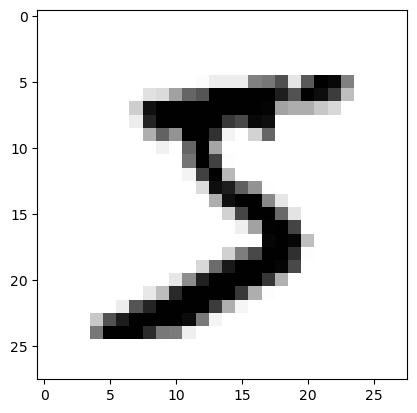

In [13]:
plt.imshow(somedigitimage,cmap='binary')

In [14]:
sgd_clf.predict([somedigit])

array([ True])

### Measuring accuracy using Cross Validation
#### Cross validation splits the training data into different folds and used 1 fold for the testing and the rest for training then the method is repeated for all folds to come up with an average accuracy
   
   
   

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,Xtrain,ytrain5,cv=3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### Not all is as it seems , lets see how the dumb classifer that predicts every single image as a not 5 class would work and its accuracy

In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros(shape=(len(X), 1), dtype=bool)



In [17]:
never_5_classifier = Never5Classifier()

scores = cross_val_score(estimator=never_5_classifier, X=Xtrain, y=ytrain5, cv=3, scoring="accuracy", n_jobs=-1)
scores



array([0.91125, 0.90855, 0.90915])

It has over 90% accuracy because 10% of the images are not 5 so if you gess not 5 each time you will be right 90% of the time

#### Accuracy is not the preferred proformance metric for classifiers especially when dealing iwht skewed data sets , when some classes are much more frequwent than others.
#### A better way to evaluate the proformance of a classifier is to use a confusion matrix
need to have a set of predictions so they can be compared to actual targets, use cross val predivt function

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,Xtrain,ytrain5,cv=3)

What is does it that instead of returning the evalutaion scores it returns the predictions made of each test fold , so you get a 'clean' prediction for each instance in the training set as the model never saw the data during the training

### now you can get the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

First row is the non 5 images the negative class . first column the true negative correct non 5s second is the false negatives incorrect non 5s so wrongly classofoed as 5s

Second row is the images of 5s the postivide class , first column  is wrongly classified as non 5s false negatives and seconds is correct classifcations as non 5s so true positives



#### Sometimes you want a more concise metric, look at the accuracy of the possitive predictions called the precision 

calculates by precision = TP/TP+FP  and use recall = TP/TP+FN  the ratio of positive instance

In [20]:
from sklearn.metrics import precision_score,recall_score
precision_score(ytrain5,y_train_pred)

0.8370879772350012

In [21]:
recall_score(ytrain5,y_train_pred)

0.6511713705958311

Recall is out of all the actual value for being positive  how many of the actual values where predictedd correctly as positive by the algo

Specificity is out of all theactual value for being negative ie non 5s how many of them where corrrectly identified as being neghative

Precision is out of all the positive predictions made by the algo how many were correct 




Hence the precision measures how accurate your positive predictions are, 


which percentage of actual positive samples was correctly classified

### F1 score is a metric that combines precision and recall , it is the harmonic mean of the precision and recall, harmonic mean gives much more weight to low values , compared to normal mean and the classifier wil only give a high F1 score if both precision nd recall are high

The threshold is a value that determines whether to class one instance as a positive or negative , you can change this thresho9ld and get different values for the recall and precision.

In scikit learn you cannot change the threshold nut you can use the decision scores that is used to make predictiosn

call the decision function method that returns a score for each instance then you can change the value of this deciion score similar to changing the threshold

In [22]:
yscore = sgd_clf.decision_function([somedigit])
yscore # For the example the score is this

array([2164.22030239])

In [23]:
threshold = 0 #new threshold for the decision function
y_some_digit_pred = (yscore>threshold)  # 
y_some_digit_pred

array([ True])

#### So what we haver done here is find the value of the decision score for that one example and changed the threshold to 0 and now we can see if the score is above this threshold you would get a true 

now lets raise the threshold then try again 

In [24]:
threshold = 2165
y_some_digit_pred = (yscore>threshold)  # 
y_some_digit_pred

array([False])

Now we get false prediction this means the recall has decrease ie the correct prediction of being a 5 out of the algos precitions has gone down

#### How do we know what threshold to use?
Use3 cross validation precition funtion buit this time puit a parameter that returns the decisionm scores and not the predictions

What this function does is get the scores of all instance sin the training set like the example before

In [25]:
y_scores = cross_val_predict(sgd_clf,Xtrain,ytrain5,cv=3, method='decision_function')

In [26]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

with all these decisionscores use precisionrecallcurveto compute a precision and recall for all possible thresholds

In [27]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(ytrain5,y_scores)

Now plot in matplot lib

In [28]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.figure(figsize = (8,4.5))
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.legend()
    plt.title('Precision and Recall vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Precision and recall')
    
def plot_precision_vs_recall(precisions,recalls):
    plt.figure(figsize = (8,4.5))
    plt.plot(precisions,recalls)
    plt.title('Precision vs Recall ')
    plt.xlabel('Recall')
    plt.ylabel('Precision ')
    
    

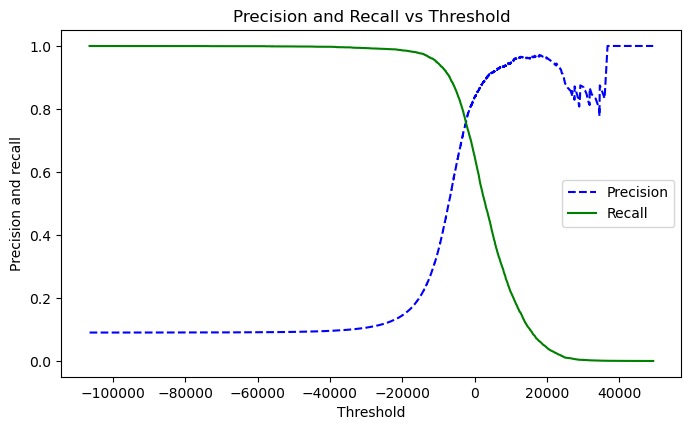

In [29]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

Lets look at a precisiomn vs recall graph

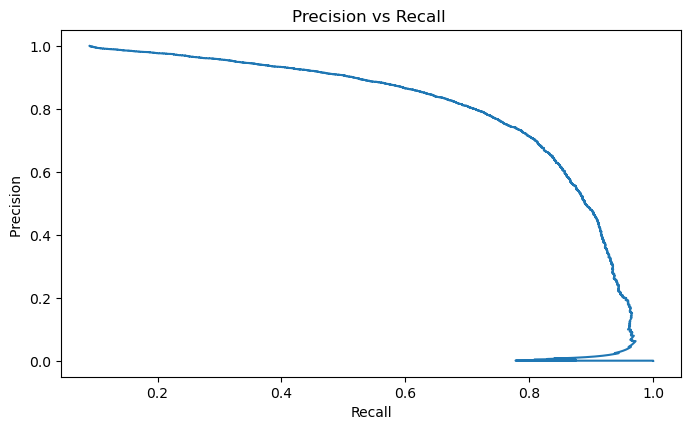

In [30]:
plot_precision_vs_recall(precisions,recalls)

You can visible see the point where there  is a sharp downturn so you want to picka precisiion and recall tradeoiff right before that point aroutn 70% however this differs from project to project

say you want a precision of 90 percent so you want the algortihm to correctly identify a 5 90 percent of the time , this would correspond to a a threshoold of around 8000 by looking at the threshold graph

see its easy to have a high precision classifier but alas having this high precision is not useul if its recall is low


#### ROC Curve

It is a ploit of the recall , true positive rate , against the False positive rate the ratio of negative instances classified as positive ( also calculates as 1 - truie postive rate or specificity)

essentially sensitivity vs 1 - specificity

to plot the roc curve use roc_curve function to comput the recall and the TNR the 1- specificity

In [31]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(ytrain5,y_scores)


now you can plot the graph notice how in the graph the higher the recall the more false postives rate the classifier produces]

In [32]:
def plotroccurve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.title('ROC Curve ')
    plt.xlabel('Recall')
    plt.ylabel('False positive rate ')
    


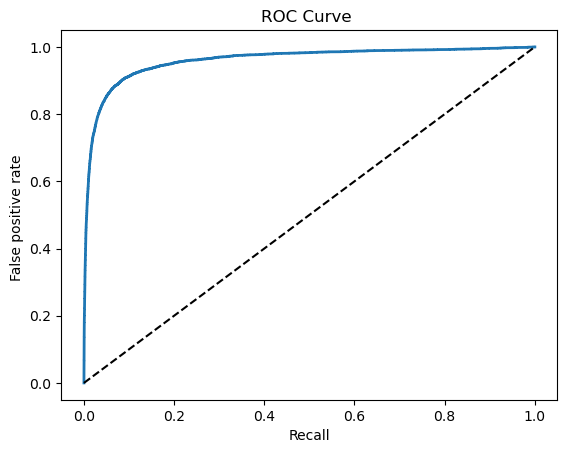

In [33]:
plotroccurve(fpr,tpr,label=None)

A way to comapre classifiers is to do the area under the curvee, the dotted line represents the ROC of a purely random classifer soa good classfier stay as far aaway as posible from it in the top lefrt corner ,

the area under the curve is the AUC and a perfect classifier will have a ROC AUC = 1 but a random one will have one =0.5

#### Calvculate the AUC

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain5,y_scores)


0.9604938554008616

So which curve do I use the ROC or the Precision Recall curve?
use PR whenever the positive class is rare or when you care more about the false positives then the false negatives
otherwise use the ROC curve  


int his case the roc curve is not that good becuase there are only a few positives (5s) compared to negatives (non 5s)

### Trya a Random Forest Classifier and compare the ROC AND ROC AUC 
Random forest doesnt have a decisionm function method it onl;y has a predict proba metyhod, classifier usually have oine or the other or both.

This type of classifier method retuirns an array , a row per instance and a column per class 
so 70000 rows and 2 colmnsu  5 or not 5 
and returns the probability of the instance being in that class

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,Xtrain,ytrain5,cv=3,method='predict_proba')

In [36]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

ROC curve functione xpects slabels and scores but instead of scores you can give it class probabilities , use the positiv e class probabilties as the score ie 5s 

In [37]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(ytrain5,y_scores_forest)

#### plot the ROC curve

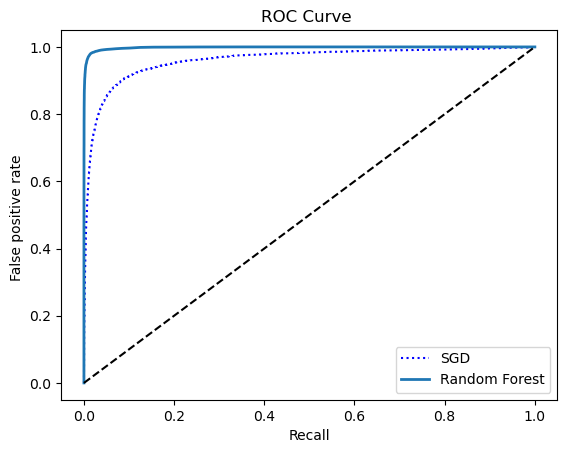

In [38]:
plt.plot(fpr,tpr,'b:',label='SGD')
plotroccurve(fpr_forest,tpr_forest,label='Random Forest')
plt.legend(loc='lower right')
plt.show()


As you can see the random forest  is better as it is much closer to the top left corner, lets check the ROC AUC score

In [39]:
roc_auc_score(ytrain5,y_scores_forest)

0.9983436731328145

#### From the two models tested the Random FOrest Model is the preferred model

## Multiclass Classification

Some classifiers such as logistic regression , random foresst etcv can natively handle multiplke classes,  but some like SGD and SVM are binary classifiers however there are strategies to use them to rpoform multi class classification with mulltiple binary classifiers

One way to do this si to use  one versus the rest stretegy OVR you seperate images into 10 classes 1-9  then when you want to classify the images youu get the decision score for each class and choose whichever ione gets the highest score

or use one versus one where you train a binary classifier for every pair of digits one to distuinguish 0s and 1s ,0s and 2s, 1s and 2s etc then when you want to classify the image you get the decisionm score so if there are N classes you need NX(N-1)/2 classifiers  and see which class wins the most duels , advantage of OVO is that each classifier only need to be trained on the part of the training tset for the two classees that it must distuinguish

Algos that scale poorlyu with the size of the training set prefer OvO becauase its faster to traon many clkassifiers on small training sets rather than few classifiers on many training sets .

for most binary classiofocation OvR is preferred

#### Scikit learn automatically picks OVO or OVR for the algorith used
lets use support vector machine, scikitn learn uses OVO and does it automatically unde3r the hood

In [40]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(Xtrain,ytrain)  #using ytrain which is not binary

SVC()

In [41]:
svm_clf.predict([somedigit])

array([5], dtype=uint8)

if you now call the decison function it will display  10 scores for the score for likelyhood top be each digit and you can see clearly that 5 had the highest score

In [42]:
somedigitscores = svm_clf.decision_function([somedigit])
somedigitscores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

Wheen a classifier is trained the list of target classes are storesd in its classes attribute in order oifff value and you can call this to compare

In [43]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

What if you want to force scikit learnt to use another classification like OvO or OvR
do this:

In [44]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC()) #turn SVC model into OVR VERSION
ovr_clf.fit(Xtrain,ytrain)
ovr_clf.predict([somedigit])

array([5], dtype=uint8)

### Do the same for SGD model
This model uses OvR strategy under the hood, since 10 categrories 10 binary classes were trained 

In [45]:
sgd_clf.fit(Xtrain,ytrain)


SGDClassifier(random_state=42)

In [46]:
sgd_clf.predict([somedigit])

array([3], dtype=uint8)

Lets look at the decision function scores as before

In [47]:
sgd_clf.decision_function([somedigit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

### How do we evaluate these multiclass models ?

You can use cross validation again

In [48]:
cross_val_score(sgd_clf,Xtrain,ytrain,cv=3,scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

How  do we increase accuracy ? do some feature scaling
the array of Xtrain values are simply ther pixel intensity fronm 0 to 255 so you can use a standard scalar method

In [49]:
Xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Xtrainscaled = scalar.fit_transform(Xtrain.astype(np.float64))
cross_val_score(sgd_clf,Xtrainscaled,ytrain,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

As you can see feature scaling increases the accuracy

## Error Analysis

Lets look at the confusion matrix , make predictions using cross val predict func them call the confusion matrix


In [51]:
ytrainpred = cross_val_predict(sgd_clf,Xtrainscaled,ytrain,cv=3)
conf_mx = confusion_matrix(ytrain,ytrainpred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

Plot on matplot lib

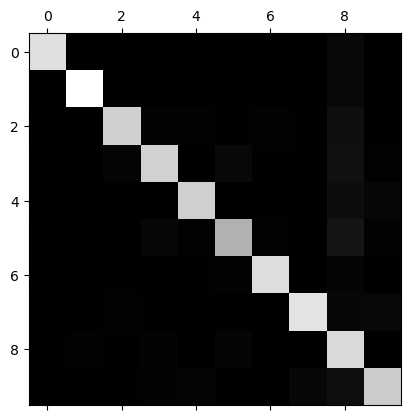

In [52]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [53]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

Since the main diagonals are bright you could say they were classified correctly,  the 5s look darker than the rest so thnic could mean the classifier does not proform as well on the 5s , time to verify this:

To check the errors, the values not on the maion diagonal , you can divide each value in the matrix by the number of images in that class so you can compare the error rates and not the absolute error which would make classes with more error sue to more instances look bad

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims = True) #the rows are the actual values not the algo predicts
norm_conf_mx = conf_mx/row_sums

Fill the diagonal with zeroes so only the erroras are in the matrix

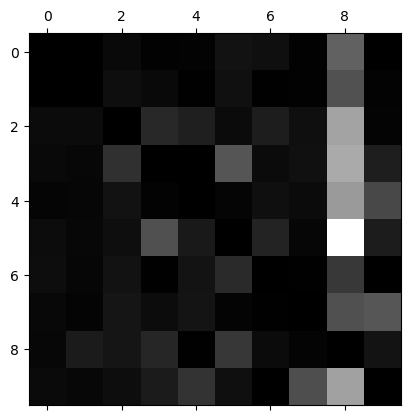

In [55]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

Now you can clearly see the errors that the algo makes ,the columns for the 8s are bright so many images are misclassifies as 8s but the row for 8s is dark so the number 8 doesnt get misclassified by the algorithm , youi can also see that threes and 5s get confused

Analysing this plot mean you should focus your time in reducing the false 8s, maybe my increasing training data with images that look similar to 8s but are not so the algo can dfistuinguish

yopu could also add new features such as number of closed loops or preoprocess the images to make closed loops stand out

### Multi label classification

e.g. classifier shown pictures to recognise alice bob and bill if a picture come up with alice and bob the classifier will output [1,1,0] so an outpout of multiple binary tags is called a muiltilabel classifications system, lets look at a simple example

In [56]:
from sklearn.neighbors import KNeighborsClassifier
ytrainlarge = (ytrain>=7)
ytrainodd = (ytrain%2==1)
y_multilabel = np.c_[ytrainlarge,ytrainodd] # joing the elements of both arrays next to eachother 

In [57]:
ytrainlarge

array([False, False, False, ..., False, False,  True])

In [58]:
ytrainodd

array([ True, False, False, ...,  True, False, False])

In [59]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

Now we have labels for all digits showing if they are large and odd , this can be used to trian the model

In [61]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(Xtrain,y_multilabel)

KNeighborsClassifier()

In [66]:
somedigit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [67]:
knn_clf.predict([somedigit])

C:\Users\vinp2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[False,  True]])

This shows that the nuumber 5 is not large and it is odd

#### How to evaluate a multilaberl classifier
one method is to measure the F1 score for each individual label then compute the average score

In [77]:
y_train_knn_pred = cross_val_predict(knn_clf, Xtrain, y_multilabel, cv=3)

C:\Users\vinp2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vinp2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [78]:
from sklearn.metrics import f1_score
f1_score(y_multilabel, ytrainknnpredict, average="macro")

0.976410265560605

This assumes all labels are equally improtant , this is not the case if you have more pictures of alice than of bobn and bill you want to give mor4e weight to the classidier score on picture so alice to do this set average to weighted

In [79]:
f1_score(y_multilabel, ytrainknnpredict, average="weighted")

0.9778357403921755